In [13]:
function naive_multiplication(A,B)
C=zeros(Float64,size(A,1),size(B,2))
  for i=1:size(A,1)
    for j=1:size(B,2)
        for k=1:size(A,2)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end


naive_multiplication (generic function with 1 method)

In [14]:
function better_multiplication( A,B )
C=zeros(Float64,size(A,1),size(B,2))
  for j=1:size(A,1)
    for k=1:size(B,2)
        for i=1:size(A,2)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

better_multiplication (generic function with 1 method)

In [15]:
function blas_multiplication(A,B)
    A * B
end

blas_multiplication (generic function with 1 method)

### Zadania
 
1.Uruchomić 
   - naive_multiplication(A,B), 
   - better_multiplication(A,B) 
   - mnożenie BLAS w Julii (A*B) 

dla coraz większych macierzy i zmierzyć czasy. Narysować wykres zależyności czasu od rozmiaru macierzy wraz z słupkami błędów, tak jak na poprzednim laboratorium. Wszystkie trzy metody powinny być na jednym wykresie.


In [16]:
using DataFrames


function calc(frame, column)
    by(frame, :size, df-> DataFrame(avg_time=mean(df[column]), std_dev=std(df[column])))
end

using Gadfly
using Compose

function layer_calc(calc)
    layer(calc, 
            x=:size, 
            y=:avg_time, 
            ymin=calc[:avg_time] - calc[:std_dev], 
            ymax=calc[:avg_time] + calc[:std_dev],
            Geom.point, Geom.errorbar, Theme(default_color=colorant"orange"))
end 

function plot_title(title)
    compose(context(0, 0, 1w, 0.25inch),
                text(0.5, 1.0, title, hcenter, vbottom))
end

plot_title (generic function with 1 method)

In [5]:
b_range = 0:50:500
range = vcat(b_range, b_range, b_range, b_range, b_range, b_range)
frame = DataFrame()
frame[:size] = [size for size in (range)]
frame[:naive] = [@elapsed naive_multiplication(rand(s, s), rand(s,s)) for s in range]
frame[:better] = [@elapsed better_multiplication(rand(s, s), ones(s, s)) for s in range]
frame[:blas] = [@elapsed blas_multiplication(ones(s, s), ones(s, s)) for s in range]

naive_calc = calc(frame, :naive)

better_calc = calc(frame, :better)

blas_calc = calc(frame, :blas)



,size,avg_time,std_dev
1,0,1.677e-6,1.9544513296575067e-7
2,50,0.005843724333333335,0.014233943093953323
3,100,0.0006162405000000001,0.0013638449292985987
4,150,0.00013505033333333335,1.632667002994385e-5
5,200,0.00024162649999999997,1.777609370756128e-5
6,250,0.0004410825000000001,1.2481419130050865e-5
7,300,0.0007058568333333333,2.6602349064822566e-5
8,350,0.0010472905000000002,4.41534437014827e-5
9,400,0.0014643019999999998,6.9296564417003656e-6
10,450,0.0020146631666666664,0.00016830032463357474


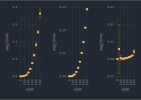

In [17]:
julia_naive_plot = plot(layer_calc(naive_calc))
julia_better_plot = plot(layer_calc(better_calc))
julia_blas_plot = plot(layer_calc(blas_calc))

julia_plot = vstack(hstack(julia_naive_plot, julia_better_plot, julia_blas_plot))

2.Napisać w języku C:
    - naiwną metodę mnożenia macierzy (wersja 1) 
    - ulepszoną za pomocą zamiany pętli metodę mnożenia macierzy (wersja 2), pamiętając, że w C macierz przechowywana jest wierszami (row major order tzn A11,A12, ..., A1m, A21, A22,...,A2m, ..Anm), inaczej niż w Julii ! 
    - skorzystać z  możliwości BLAS dostępnego w GSL(wersja 3). 
    
Należy porównywać działanie tych trzech algorytmow bez włączonej opcji optymalizacji kompilatora. Przedstawić wyniki na jednym wykresie tak jak w p.1.(osobno niż p.1). (Dla chętnych) sprawdzić, co się dzieje, jak włączymy optymalizację kompilatora i dodać do wykresu.



  likely near In[8]:1
  likely near In[8]:1
  likely near In[8]:1
  likely near In[8]:1
  likely near In[8]:1
  likely near In[8]:1
  likely near In[8]:1
  likely near In[8]:1
  likely near In[8]:1
  likely near In[8]:1
  likely near In[8]:1
  likely near In[8]:1
  likely near In[8]:1
  likely near In[8]:1
  likely near In[8]:1
  likely near In[8]:1
  likely near In[8]:1
  likely near In[8]:1
  likely near In[8]:1
  likely near In[8]:1
  likely near In[8]:1
  likely near In[8]:1
  likely near In[8]:1
in #readtable#84 at ///////////////////////////////////////////////////home/marcin/.julia/JuliaPro-0.6.0.1/JuliaPro/pkgs-0.6.0.1/v0.6/DataFrames/src/dataframe/io.jl
  likely near In[8]:1
in #readtable#84 at ///////////////////////////////////////////////////home/marcin/.julia/JuliaPro-0.6.0.1/JuliaPro/pkgs-0.6.0.1/v0.6/DataFrames/src/dataframe/io.jl
  likely near In[8]:1
  likely near In[8]:1
  likely near In[8]:1
  likely near In[8]:1
  likely near In[8]:1
  likely near In[8]:1
  likely n

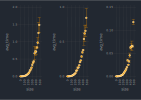

In [8]:
naive_c_unopt = calc(readtable("matrices/naive_unoptimized.csv"), :result)
better_c_unopt = calc(readtable("matrices/better_unoptimized.csv"), :result)
blas_c_unopt = calc(readtable("matrices/blas_unoptimized.csv"), :result)


c_unopt_naive_plot = plot(layer_calc(naive_c_unopt))
c_unopt_better_plot = plot(layer_calc(better_c_unopt))
c_unopt_blas_plot = plot(layer_calc(blas_c_unopt))

c_unopt_plot = vstack(hstack(c_unopt_naive_plot, c_unopt_better_plot, c_unopt_blas_plot))

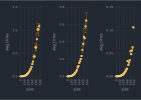

In [9]:
# compiled with -Ofast option
naive_c_opt = calc(readtable("matrices/naive.csv"), :result)
better_c_opt = calc(readtable("matrices/better.csv"), :result)
blas_c_opt = calc(readtable("matrices/blas.csv"), :result)


c_opt_naive_plot = plot(layer_calc(naive_c_opt))
c_opt_better_plot = plot(layer_calc(better_c_opt))
c_opt_blas_plot = plot(layer_calc(blas_c_opt))

c_opt_plot = vstack(hstack(c_opt_naive_plot, c_opt_better_plot, c_opt_blas_plot))

# the performance is improved by a factor of 1.5 - however not even close to Julia's performance. 
# some problem may be in the time units of my measurements, but AFAIK it doesn't seem to be the case

3.Użyć funkcji curve_fit  z pakietu  do aproxymacji   do znalezienia odpowiednich wielomianow, ktore najlepiej pasują do zależności czasowych kazdego z algorytmow. Stopień wielomianu powinien zgadzać się z teoretyczną złożonoscią. Dodać wykresy uzyskanych wielomianow do wczesniejszych  wykresów.

In [10]:
using CurveFit

function calc_fit(calc, degree=3)
    x = convert(Array{Float64, 1}, calc[:size])
    y = convert(Array{Float64, 1}, calc[:avg_time])
    poly_fit(x, y , degree) 
end

function poly(p)
    f(x) = sum([p[i]*(x^(i - 1)) for i in 1:length(p)])
end

naive_julia_fit = calc_fit(naive_calc)
better_julia_fit = calc_fit(better_calc)
blas_julia_fit = calc_fit(blas_calc)
naive_c_unopt_fit = calc_fit(naive_c_unopt)
better_c_unopt_fit = calc_fit(better_c_unopt)
blas_c_unopt_fit = calc_fit(blas_c_unopt)
naive_c_opt_fit = calc_fit(naive_c_opt)
better_c_opt_fit = calc_fit(better_c_opt)
blas_c_opt_fit = calc_fit(blas_c_opt)

naive_julia_fun = poly(naive_julia_fit)
better_julia_fun = poly(better_julia_fit)
blas_julia_fun = poly(blas_julia_fit)
naive_c_unopt_fun = poly(naive_c_unopt_fit)
better_c_unopt_fun = poly(better_c_unopt_fit)
blas_c_unopt_fun = poly(blas_c_unopt_fit)
naive_c_opt_fun = poly(naive_c_opt_fit)
better_c_opt_fun = poly(better_c_opt_fit)
blas_c_opt_fun = poly(blas_c_opt_fit)


Use "abstract type ApproxFit end" instead.

Use "abstract type LeastSquares<:ApproxFit end" instead.

Use "LinearFit{T}(...) where T" instead.

Use "LogFit{T}(...) where T" instead.

Use "PowerFit{T}(...) where T" instead.

Use "ExpFit{T}(...) where T" instead.


(::f) (generic function with 1 method)

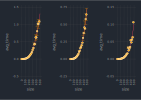

In [11]:
julia_naive_plot = plot(layer_calc(naive_calc), layer(naive_julia_fun, 1, 500))
julia_better_plot = plot(layer_calc(better_calc), layer(better_julia_fun, 1, 500))
julia_blas_plot = plot(layer_calc(blas_calc), layer(blas_julia_fun, 1, 500))

julia_plot = vstack(hstack(julia_naive_plot, julia_better_plot, julia_blas_plot))

c_unopt_naive_plot = plot(layer_calc(naive_c_unopt), layer(naive_c_unopt_fun, 1, 500))
c_unopt_better_plot = plot(layer_calc(better_c_unopt), layer(better_c_unopt_fun, 1, 500))
c_unopt_blas_plot = plot(layer_calc(blas_c_unopt), layer(blas_c_unopt_fun, 1, 500))

c_unopt_plot = vstack(hstack(c_unopt_naive_plot, c_unopt_better_plot, c_unopt_blas_plot))

c_opt_naive_plot = plot(layer_calc(naive_c_opt), layer(naive_c_opt_fun, 1, 500))
c_opt_better_plot = plot(layer_calc(better_c_opt), layer(better_c_opt_fun, 1, 500))
c_opt_blas_plot = plot(layer_calc(blas_c_opt), layer(blas_c_opt_fun, 1, 500))

c_opt_plot = vstack(hstack(c_opt_naive_plot, c_opt_better_plot, c_opt_blas_plot))



4.Przedstawić wyniki dla języka Julia i C na wspólnym wykresie. Jaka metoda jest najszybsza? 


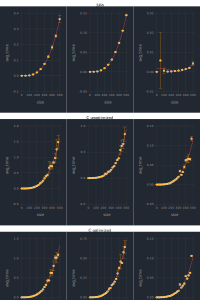

  likely near In[12]:1
  likely near In[12]:1
  likely near In[12]:1
  likely near In[12]:1
  likely near In[12]:1
  likely near In[12]:1
  likely near In[12]:1
  likely near In[12]:1
  likely near In[12]:1
  likely near In[12]:1
  likely near In[12]:1
  likely near In[12]:1
  likely near In[12]:1
  likely near In[12]:1
  likely near In[12]:1
  likely near In[12]:1


In [12]:
draw(SVG(20cm, 30cm), vstack(
        plot_title("Julia"), julia_plot, 
        plot_title("C unoptimized"), c_unopt_plot, 
        plot_title("C optimized"), c_opt_plot))